<img src="img/TJI_logo_whitebg_440x220.jpg" alt="drawing" style="width: 220px;float: right"/>

# Analysis: Exploration of officers-shot data
---

## Overview

Summary statistics of police shot by civilians, from Peace Officer Involved Shooting Reports submitted to the Texas Attorney General.

## Summary of findings
* Data collection began in September 2015
* About 30 officers are shot each year by civilians.
* About 20% die from the incident.
* Officers of all ages are shot.
* White and hispanic officers comprise 90% of those shot (in equal parts).
* About 95% are male.
* About 95% of the civilians doing the shooting are male.
* About 45% of civilians doing the shooting are hispanic, 35% are black, 25% are white.
* 50% of officer shooting incidents happen in 3 counties: Harris (Houston), Bexar (San Antonio), Dallas (Dallas)


## Datasets used:
* `tji/officer-involved-shootings/shot_officers.csv`
* `tji/auxiliary-datasets/texas_counties`

##### Author: Everett Wetchler (everett.wetchler@gmail.com)

## [ Setup and load data ]

In [1]:
import datadotworld as dw
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

%matplotlib inline

# Watermark extension to print version/system information
# Flags:
# -a [author] -d (date) -t (time) -z (timezone) -r (repo)
# -g (git hash) -w (watermark version) -p [packages] (package info)
%load_ext watermark
%watermark -a 'Everett Wetchler' -g -d -t -z -w -p numpy,pandas,matplotlib,seaborn,datadotworld

Everett Wetchler 2018-05-27 18:36:29 CDT

numpy 1.14.3
pandas 0.20.1
matplotlib 2.2.0
seaborn 0.7.1
datadotworld 1.6.0
Git hash: 39e6616d42fa05cfca96a73d959a3de90a92317f
watermark 1.5.0


Removing 2 past plots


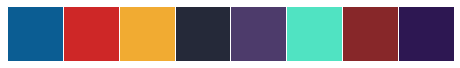

In [2]:
from lib.utils import *
from lib.style import *

plotsaver = PlotSaver('../plots/', 'ois_officers_')
sns.palplot(sns.color_palette())

In [3]:
datasets = dw.load_dataset('tji/officer-involved-shootings', force_update=True)
shootings = datasets.dataframes['shot_officers']

first_shooting = shootings.date_incident.min().strftime('%Y-%m-%d')
last_shooting = shootings.date_incident.max().strftime('%Y-%m-%d')
print("Officers shot data from %s to %s" % (first_shooting, last_shooting))

shootings.head()

Officers shot data from 2015-10-06 to 2018-04-24


,date_ag_received,date_incident,incident_address,incident_census_tract,incident_city,incident_county,incident_latitude,incident_longitude,incident_zip,officer_died,officer_name_first,officer_name_last,officer_age,officer_race,officer_gender,agency_name_1,agency_city_1,agency_county_1,agency_zip_1,agency_report_date_1,agency_name_person_filling_out_1,agency_email_person_filling_out_1,agency_name_2,agency_city_2,agency_county_2,agency_zip_2,agency_report_date_2,agency_name_person_filling_out_2,agency_email_person_filling_out_2,civilian_died,civilian_suicide,civilian_name_first_1,civilian_name_last_1,civilian_age_1,civilian_race_1,civilian_gender_1,civilian_name_first_2,civilian_name_last_2,civilian_age_2,civilian_race_2,civilian_gender_2,civilian_name_first_3,civilian_name_last_3,civilian_age_3,civilian_race_3,civilian_gender_3,media_link_1,media_link_2,media_link_3,incident_location
0,NaT,2015-10-06,815 LAMAR DRIVE,210400.0,SEGUIN,GUADALUPE,29.576609,-97.947667,78155,False,NaN,NaN,54.0,WHITE,F,SEGUIN POLICE DEPT,SEGUIN,GUADALUPE,78155,10/26/2015,MC MEYERS,MCMEYERS@SEGUINTEXAS.GOV,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,54.0,WHITE,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT(-97.9476667 29.576609)
1,NaT,2015-10-30,8000 MIDCROWN,121403.0,SAN ANTONIO,BEXAR,29.507478,-98.380029,78218,False,JOSEPH,CANALES,42.0,HISPANIC,M,BEXAR CO SHERIFFS OFFICE,SAN ANTONIO,BEXAR,78207,11/3/2015,DET. FRANK STUBBS #4048,SSTUBBS@BEXAR.ORG,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,SHERMAN,ROBINSON,36.0,BLACK,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MYSA,NEWS4SANANTONIO,NaN,POINT(-98.3800289 29.5074775)
2,2017-02-21,2015-11-01,301 W. AVENUE B,20701.0,TEMPLE,BELL,31.095688,-97.344775,76501,True,DARRELL,ALLEN,42.0,BLACK,M,MARLIN POLICE DEPT,MARLIN,FALLS,76661,2/21/2017,DAMIEN EAGLIN,CHIEFEAGLIN@MARLINTX.NET,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WACO TRIBUNE-HERALD,NaN,NaN,POINT(-97.3447755 31.0956876)
3,NaT,2015-12-23,1025 CUSTER AVE.,1700.0,ODESSA,ECTOR,31.865143,-102.335850,79761,False,PETE,GONZALES,42.0,HISPANIC,M,ODESSA POLICE DEPT,ODESSA,ECTOR,79761,12/29/2015,SGT. DAVID LARA,DLARA@ODESSA-TX.GOV,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,ROY DANIEL,GARZA,27.0,HISPANIC,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CBS 7,BIG COUNTRY,NaN,POINT(-102.3358504 31.8651433)
4,NaT,2015-12-23,1025 CUSTER AVE.,1700.0,ODESSA,ECTOR,31.865143,-102.335850,79761,False,CORY,WESTER,38.0,WHITE,M,ODESSA POLICE DEPT,ODESSA,ECTOR,79761,12/29/2015,SGT. DAVID LARA,DLARA@ODESSA-TX.GOV,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,ROY DANIEL,GARZA,27.0,HISPANIC,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CBS 7,BIG COUNTRY,NaN,POINT(-102.3358504 31.8651433)


In [4]:
incidents = shootings.drop_duplicates(subset=['civilian_name_first_1', 'civilian_name_last_1', 'date_incident'])
print("Grouped %d officers shot into %d unique incidents" % (len(shootings), len(incidents)))

Grouped 78 officers shot into 57 unique incidents


## [ WHEN do shootings happen? ]

In [5]:
shootings['year'] = shootings['date_incident'].apply(lambda dt: '%d' % (dt.year))
shootings['month'] = shootings['date_incident'].apply(lambda dt: '%d-%02d' % (dt.year, dt.month))

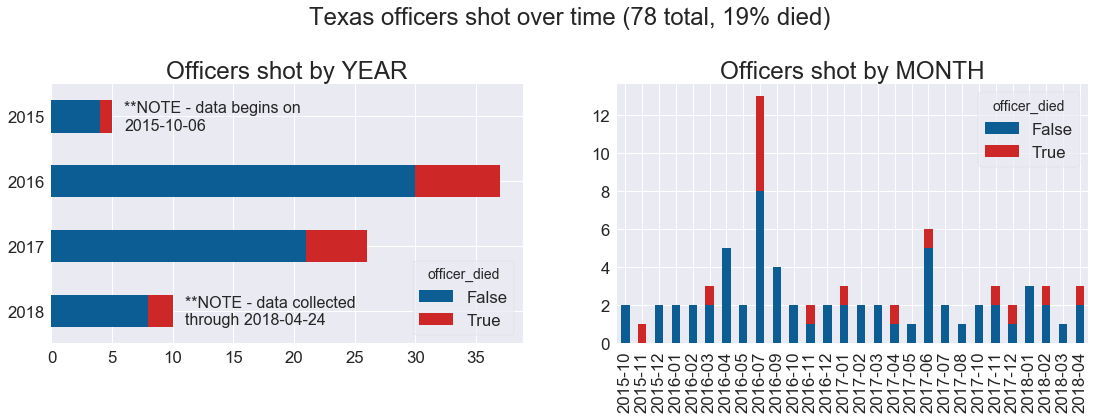

In [6]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(16, 6)
fig.suptitle('Texas officers shot over time (%d total, %.0f%% died)' % (
    len(shootings), shootings['officer_died'].mean() * 100), fontsize=24)
ax=axes[0]
ax.set_title('Officers shot by YEAR')
shootings.groupby(['year', 'officer_died']).size().unstack()[::-1].plot(
    kind='barh', stacked=True, ax=ax, color=[TJI_BLUE, TJI_RED])
ax.set_ylabel('')
ax.text(6, 3, '**NOTE - data begins on\n' + first_shooting, verticalalignment='center', fontsize=16)
ax.text(11, 0, '**NOTE - data collected\nthrough ' + last_shooting, verticalalignment='center', fontsize=16)

ax=axes[1]
shootings.groupby(['month', 'officer_died']).size().unstack().plot(
    kind='bar', stacked=True, ax=ax, color=[TJI_BLUE, TJI_RED])
ax.set_title('Officers shot by MONTH')
ax.set_xlabel('')
plt.subplots_adjust(left=.05, right=.95, bottom=0.2, top=0.8)
plotsaver.saveplot(fig, 'year_month')

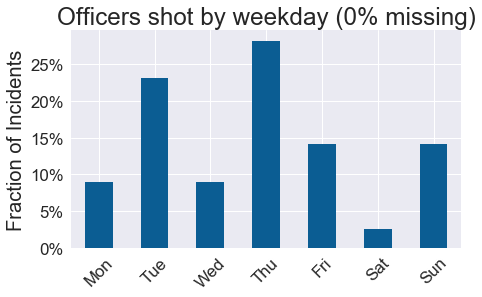

In [7]:
fig, ax = plt.subplots()

fig.set_size_inches(7, 4)
counts = shootings['date_incident'].apply(lambda dt: dt.weekday()).value_counts(True).sort_index()
ax.set_ylabel('Fraction of Incidents')
percentify_y(ax, decimals=0)
counts.index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
counts.plot(kind='bar', ax=ax)
ax.set_title('Officers shot by weekday (%.0f%% missing)' % (shootings.date_incident.isnull().mean() * 100))
plt.xticks(rotation=45)
plotsaver.saveplot(fig, 'weekday')

## [ WHERE do shootings happen? ]

In [8]:
datasets = dw.load_dataset('tji/auxiliary-datasets', force_update=True)
county_seats = datasets.dataframes['texas_counties'].set_index('county')['seat']
county_seats.head()

county
ANDERSON      PALESTINE
ANDREWS         ANDREWS
ANGELINA         LUFKIN
ARANSAS        ROCKPORT
ARCHER      ARCHER CITY
Name: seat, dtype: object

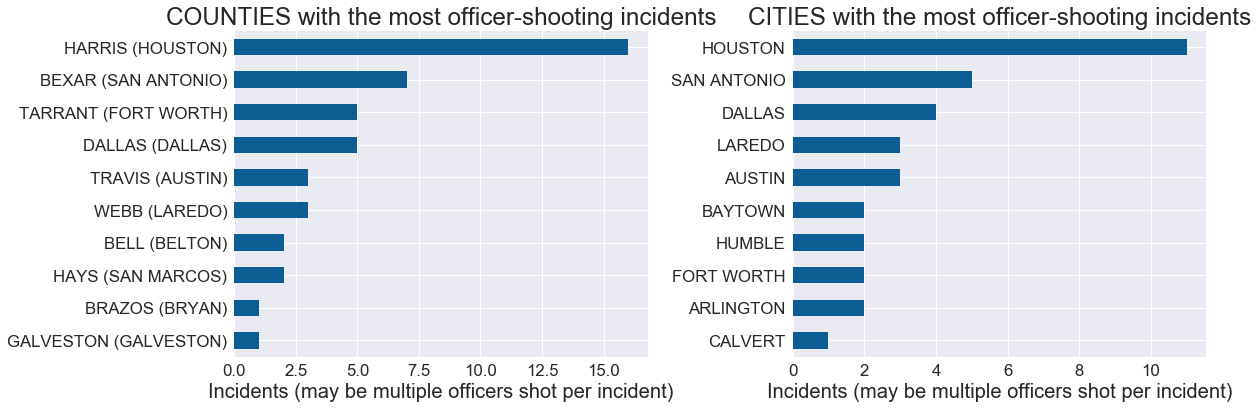

In [9]:
top_counties = incidents.incident_county.value_counts().head(10)
top_counties.index = pd.Series(top_counties.index).apply(
    lambda county: "%s (%s)" % (county, county_seats[county]))

fig, axes = plt.subplots(1, 2)
fig.set_size_inches(18, 6)

ax = axes[0]
top_counties[::-1].plot(kind='barh', ax=ax)
ax.set_title('COUNTIES with the most officer-shooting incidents')
ax.set_xlabel("Incidents (may be multiple officers shot per incident)")

ax = axes[1]
incidents['incident_city'].value_counts()[:10][::-1].plot(kind='barh', ax=ax)
ax.set_title("CITIES with the most officer-shooting incidents")
ax.set_xlabel("Incidents (may be multiple officers shot per incident)")

plt.subplots_adjust(left=0.2, wspace=.35, right=.95)
plotsaver.saveplot(fig, 'incidents_by_location')

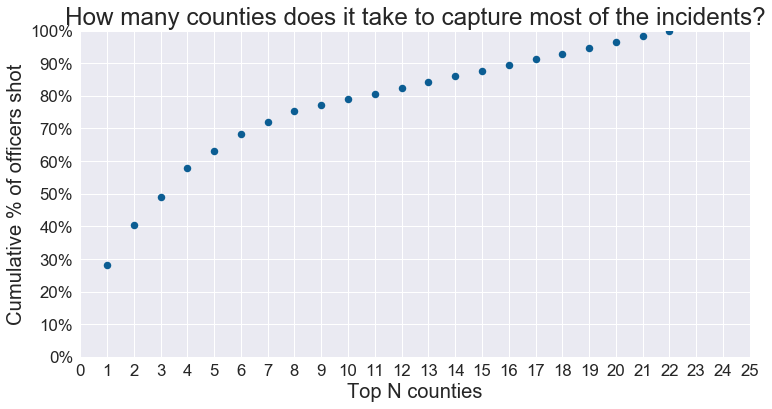

In [10]:
fig, ax = plt.subplots(1)
s = incidents['incident_county'].value_counts(True, ascending=False)
s.index = range(1, len(s) + 1)
s.cumsum().plot(ax=ax, marker='.', linewidth=0, markersize=15)
ax.set_ylim((0, 1))
ax.set_yticks(np.arange(0, 1.01, .1))
ax.set_yticklabels(['%d%%' % i for i in range(0, 101, 10)])
ax.set_xticks(range(0, int(ax.get_xlim()[1]) + 5, 5))
ax.legend_ = None
ax.set_title('How many counties does it take to capture most of the incidents?')
ax.set_xlabel('Top N counties')
ax.set_ylabel('Cumulative % of officers shot')
ax.set_xticks(list(range(0, int(ax.get_xlim()[1]) + 1)))
fig.set_size_inches(12, 6)
plotsaver.saveplot(fig, 'cumulative_incidents_by_county')

## [ What officers get shot? ]

/Users/everettwetchler/.virtualenvs/tji-analysis/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


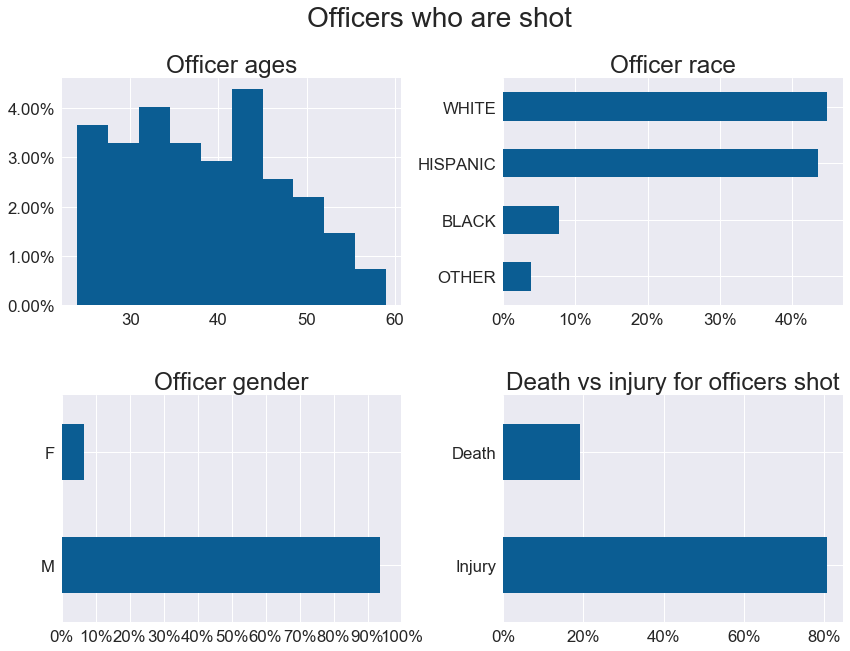

In [11]:
fig, axes = plt.subplots(2, 2)
fig.set_size_inches(14, 10)
fig.suptitle('Officers who are shot', fontsize=28)

ax = axes[0][0]
shootings.officer_age.hist(ax=ax, normed=True)
ax.set_title('Officer ages')
percentify_y(ax)

ax = axes[0][1]
shootings.officer_race.value_counts(True)[::-1].plot(kind='barh', ax=ax)
ax.set_title('Officer race')
percentify_x(ax, decimals=0)

ax = axes[1][0]
shootings.officer_gender.value_counts(True).plot(kind='barh', ax=ax)
ax.set_xticks(np.arange(0, 1.01, .1))
ax.set_title('Officer gender')
percentify_x(ax)

ax = axes[1][1]
shootings['officer_died'].value_counts(True).plot(kind='barh', ax=ax)
ax.set_yticklabels([ 'Death' if t.get_text() == 'True' else 'Injury' for t in ax.get_yticklabels()])
percentify_x(ax)
ax.set_title('Death vs injury for officers shot')

plt.subplots_adjust(hspace=0.4, wspace=.3)
plotsaver.saveplot(fig, 'officer_summary')

## [ What civilians are involved? ]

/Users/everettwetchler/.virtualenvs/tji-analysis/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


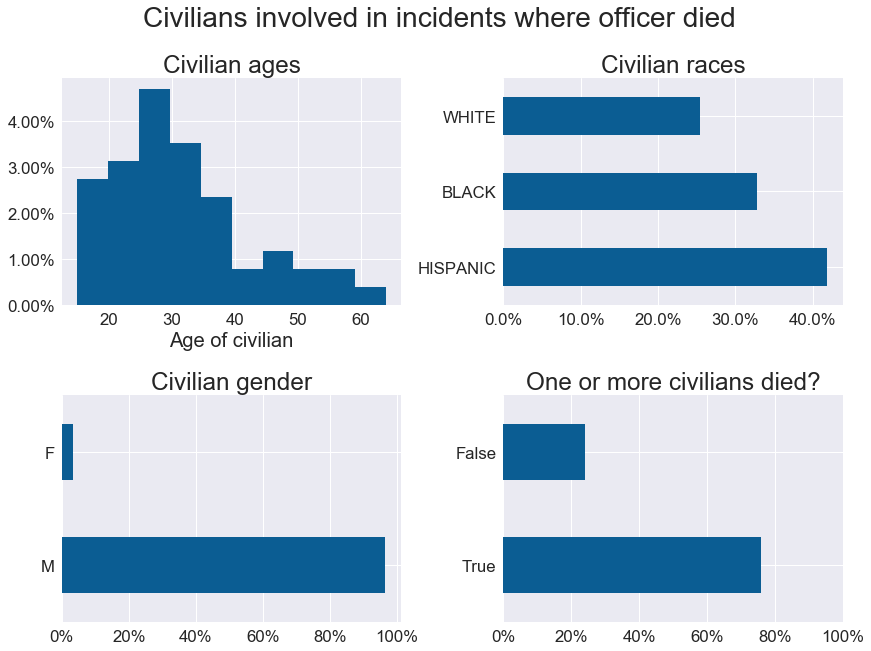

In [12]:
all_civilian_ages = []
all_civilian_races = []
all_civilian_genders = []
for i in range(1, 4):
    all_civilian_ages.extend(list(incidents['civilian_age_%d' % i].dropna()))
    all_civilian_races.extend(list(incidents['civilian_race_%d' % i].dropna()))
    all_civilian_genders.extend(list(incidents['civilian_gender_%d' % i].dropna()))

all_civilian_ages = pd.Series(all_civilian_ages)
all_civilian_races = pd.Series(all_civilian_races)
all_civilian_genders = pd.Series(all_civilian_genders)

fig, axes = plt.subplots(2, 2)
fig.set_size_inches(14, 10)
fig.suptitle('Civilians involved in incidents where officer died', fontsize=28)

ax = axes[0][0]
all_civilian_ages.hist(ax=ax, normed=True)
ax.set_title('Civilian ages')
ax.set_xlabel('Age of civilian')
percentify_y(ax)

ax = axes[0][1]
all_civilian_races.value_counts(True).plot(kind='barh', ax=ax)
ax.set_title('Civilian races')
percentify_x(ax)

ax = axes[1][0]
all_civilian_genders.value_counts(True).plot(kind='barh', ax=ax)
ax.set_title('Civilian gender')
percentify_x(ax)

ax = axes[1][1]
incidents['civilian_died'].value_counts(True).plot(kind='barh', ax=ax)
ax.set_title('One or more civilians died?')
ax.set_xlim((0, 1))
percentify_x(ax)

plt.subplots_adjust(hspace=0.4, wspace=0.3)
plotsaver.saveplot(fig, 'civilian_summary')